# Import LIbrary

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Load Datasets

In [2]:
# Load data dari file CSV
data = pd.read_csv('MBA.csv')

# Tampilkan beberapa baris pertama data
print(data.head())

   application_id  gender  international   gpa       major      race   gmat  \
0               1  Female          False  3.30    Business     Asian  620.0   
1               2    Male          False  3.28  Humanities     Black  680.0   
2               3  Female           True  3.30    Business       NaN  710.0   
3               4    Male          False  3.47        STEM     Black  690.0   
4               5    Male          False  3.35        STEM  Hispanic  590.0   

   work_exp          work_industry admission  
0       3.0     Financial Services     Admit  
1       5.0  Investment Management       NaN  
2       5.0             Technology     Admit  
3       6.0             Technology       NaN  
4       5.0             Consulting       NaN  


# Split Dataset

In [3]:
# Encode target variable
data['admission'] = data['admission'].apply(lambda x: 1 if x == 'Admit' else 0)

# Pisahkan fitur dan target
X = data.drop(['admission', 'application_id'], axis=1)
y = data['admission']

In [4]:
# Split data setelah SMOTE dan normalisasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Analisis Dasar Dataset

In [5]:
# Cek jumlah baris dan kolom
data.shape


(6194, 10)

In [6]:
# Cek tipe data setiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   int64  
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 441.7+ KB


In [7]:
# Cek statistik deskriptif untuk kolom numerik
data.describe()

,application_id,gpa,gmat,work_exp,admission
count,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952,0.145302
std,1788.198115,0.151541,49.294883,1.032432,0.352433
min,1.000000,2.650000,570.000000,1.000000,0.000000
25%,1549.250000,3.150000,610.000000,4.000000,0.000000
50%,3097.500000,3.250000,650.000000,5.000000,0.000000
75%,4645.750000,3.350000,680.000000,6.000000,0.000000
max,6194.000000,3.770000,780.000000,9.000000,1.000000


application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission            0
dtype: int64


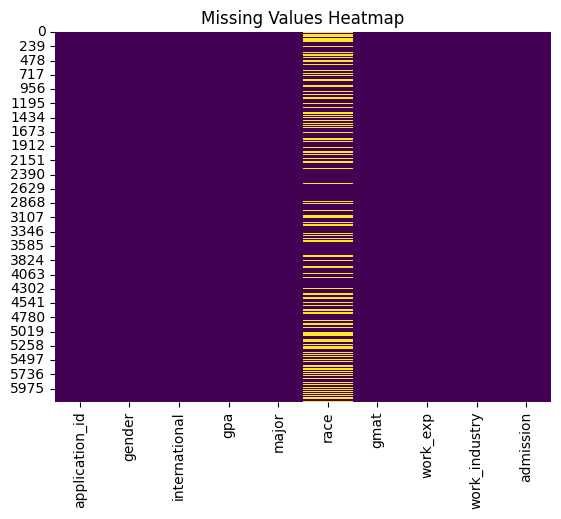

In [8]:
# Cek jumlah missing values di setiap kolom
print(data.isnull().sum())

# Visualisasi missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

<ipython-input-9-780818476b46>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='admission', data=data, palette='Set2')


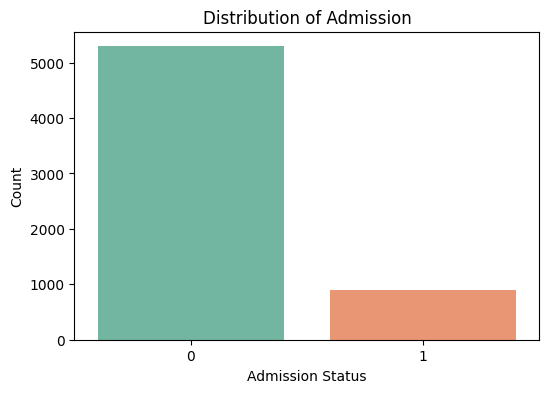

admission
0    5294
1     900
Name: count, dtype: int64


In [9]:
# Hitung jumlah admission (Admit vs Non-Admit)
admission_counts = data['admission'].value_counts()

# Visualisasi distribusi admission
plt.figure(figsize=(6, 4))
sns.countplot(x='admission', data=data, palette='Set2')
plt.title("Distribution of Admission")
plt.xlabel("Admission Status")
plt.ylabel("Count")
plt.show()

print(admission_counts)

# Analisis Univariate

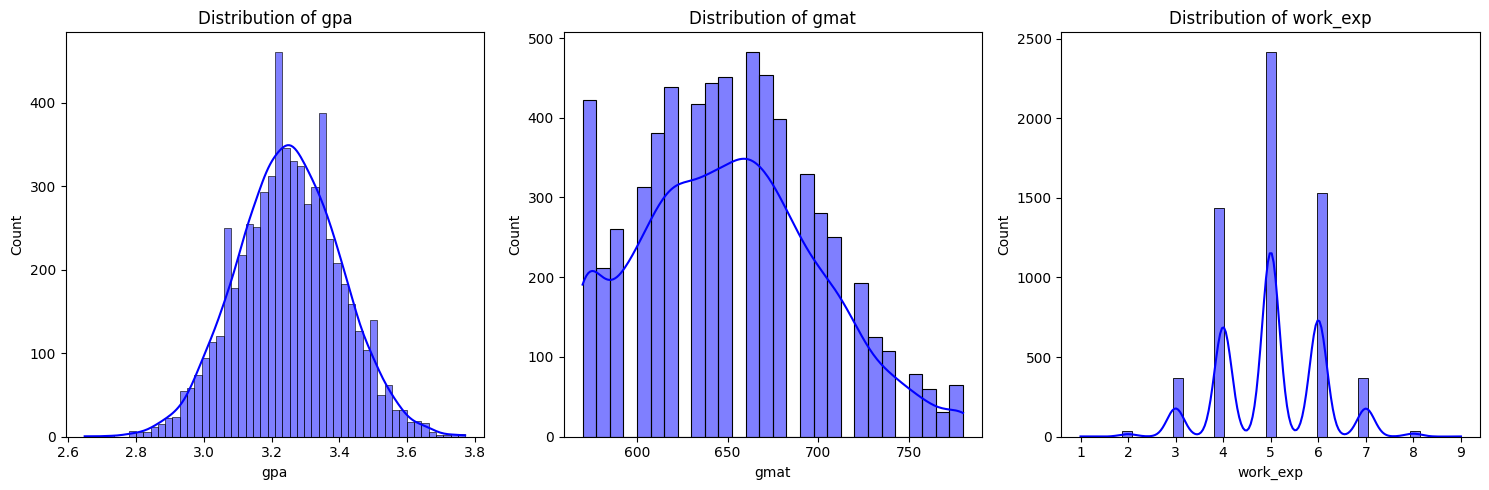

In [10]:
# Plot distribusi variabel numerik (misalnya GPA, GMAT, work_exp)
numerical_cols = ['gpa', 'gmat', 'work_exp']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Distribusi GPA (Panel Kiri)

* Distribusi GPA terlihat mendekati distribusi normal dengan puncak di sekitar 3.2 hingga 3.3.
* Sebagian besar mahasiswa memiliki GPA antara 3.0 dan 3.5.
* Ada sedikit skew ke arah kanan, tetapi umumnya simetris.

Distribusi GMAT (Panel Tengah)

* Distribusi GMAT cenderung skewed ke kiri, dengan banyak peserta yang memiliki skor sekitar 600-700.
* Ada puncak signifikan di sekitar 650, yang mungkin menunjukkan bahwa banyak mahasiswa memiliki skor di kisaran ini.
* Jumlah peserta menurun setelah skor 700, tetapi masih ada beberapa yang memiliki skor lebih tinggi.

Distribusi Pengalaman Kerja (Work Experience) (Panel Kanan)

* Distribusi work experience bersifat multimodal (memiliki beberapa puncak).
* Puncak-puncak yang jelas terlihat di sekitar 3, 5, dan 6 tahun pengalaman kerja.
* Ini bisa menunjukkan bahwa ada kelompok besar mahasiswa yang masuk dengan jumlah pengalaman kerja tertentu (mungkin karena persyaratan program MBA atau kebijakan penerimaan).

Kesimpulan:
* Sebagian besar mahasiswa memiliki GPA sekitar 3.2 – 3.3, yang menunjukkan bahwa mayoritas memiliki nilai akademik yang cukup baik dan distribusinya mendekati normal.
* Skor GMAT lebih bervariasi dan cenderung skewed ke kiri, dengan mayoritas peserta memiliki skor antara 600 – 700. Hal ini menunjukkan bahwa sebagian besar mahasiswa memiliki skor GMAT di kisaran menengah hingga tinggi.
* Distribusi pengalaman kerja menunjukkan pola multimodal, dengan puncak di sekitar 3, 5, dan 6 tahun pengalaman kerja. Ini mungkin menunjukkan adanya pola penerimaan tertentu berdasarkan pengalaman kerja.

Secara keseluruhan, data ini mencerminkan bahwa mayoritas mahasiswa yang masuk memiliki performa akademik yang baik, skor GMAT yang cukup tinggi, dan pengalaman kerja yang bervariasi, dengan beberapa kelompok pengalaman kerja yang dominan.

<ipython-input-11-0b161c0b058e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set3')
<ipython-input-11-0b161c0b058e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set3')
<ipython-input-11-0b161c0b058e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set3')
<ipython-input-11-0b161c0b058e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

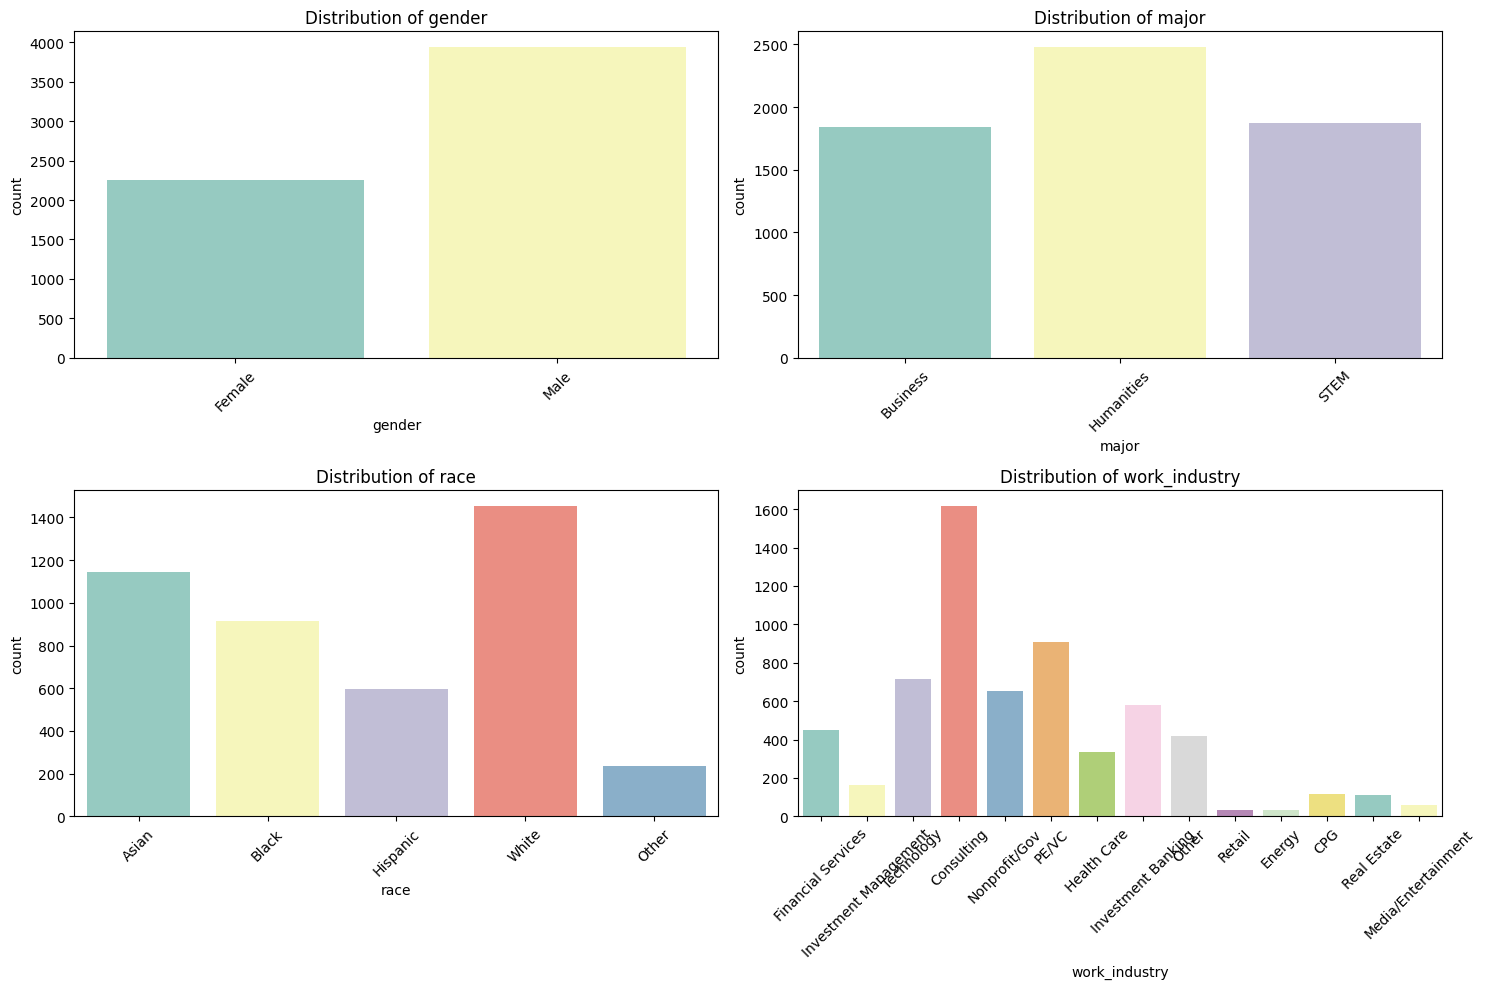

In [11]:
# Plot distribusi variabel kategorikal (misalnya gender, major, race)
categorical_cols = ['gender', 'major', 'race', 'work_industry']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=data, palette='Set3')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Distribusi Gender

    * Jumlah mahasiswa laki-laki lebih banyak dibandingkan perempuan.

2. Distribusi Jurusan (Major)

    * Mayoritas mahasiswa berasal dari jurusan Humanities, diikuti oleh Business dan STEM.

3. Distribusi Ras

    * Mayoritas mahasiswa berasal dari kelompok White, diikuti oleh Asian, Black, dan Hispanic.

4. Distribusi Industri Pekerjaan

    * Consulting adalah industri yang paling dominan, diikuti oleh Nonprofit/Gov dan Technology.

    * Industri seperti Media/Entertainment, Real Estate, Energy, dan Retail memiliki jumlah mahasiswa yang lebih sedikit.

Kesimpulan

Mayoritas mahasiswa yang diterima berasal dari jurusan Humanities, ras White, latar belakang industri Consulting, dan lebih banyak laki-laki dibandingkan perempuan. Hal ini menunjukkan pola seleksi yang lebih cenderung menerima kandidat dari kelompok ini.

# Analisis Bivariate

<ipython-input-12-c0753a333f66>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='admission', y=col, data=data, palette='Set2')
<ipython-input-12-c0753a333f66>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='admission', y=col, data=data, palette='Set2')
<ipython-input-12-c0753a333f66>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='admission', y=col, data=data, palette='Set2')


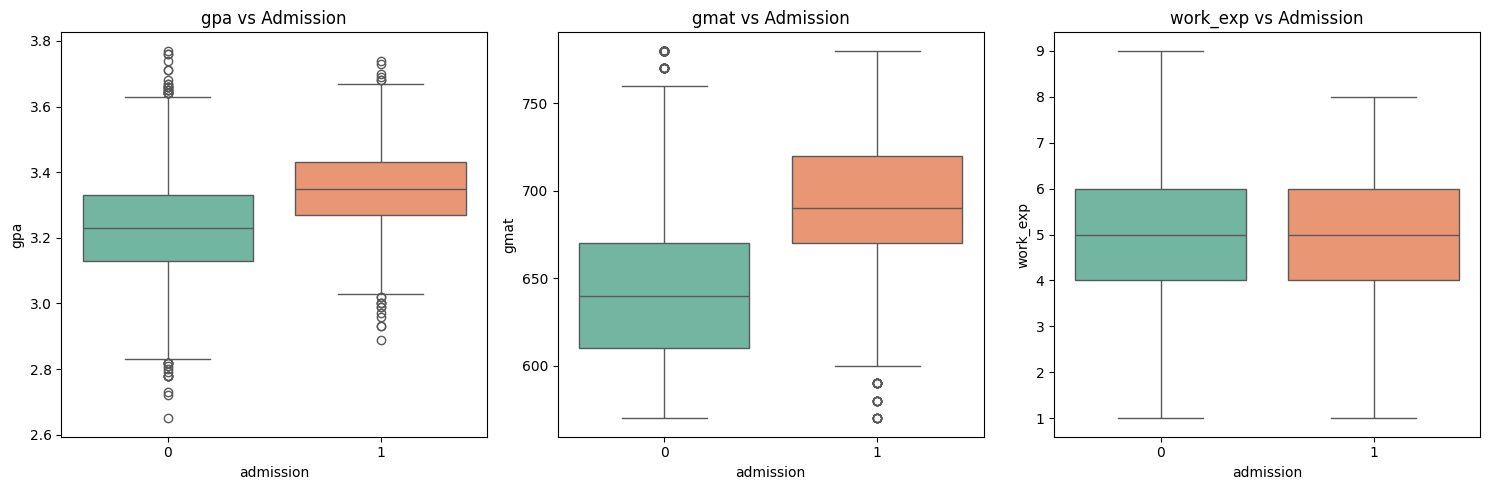

In [12]:
# Boxplot untuk melihat hubungan antara variabel numerik dan admission
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='admission', y=col, data=data, palette='Set2')
    plt.title(f"{col} vs Admission")
plt.tight_layout()
plt.show()

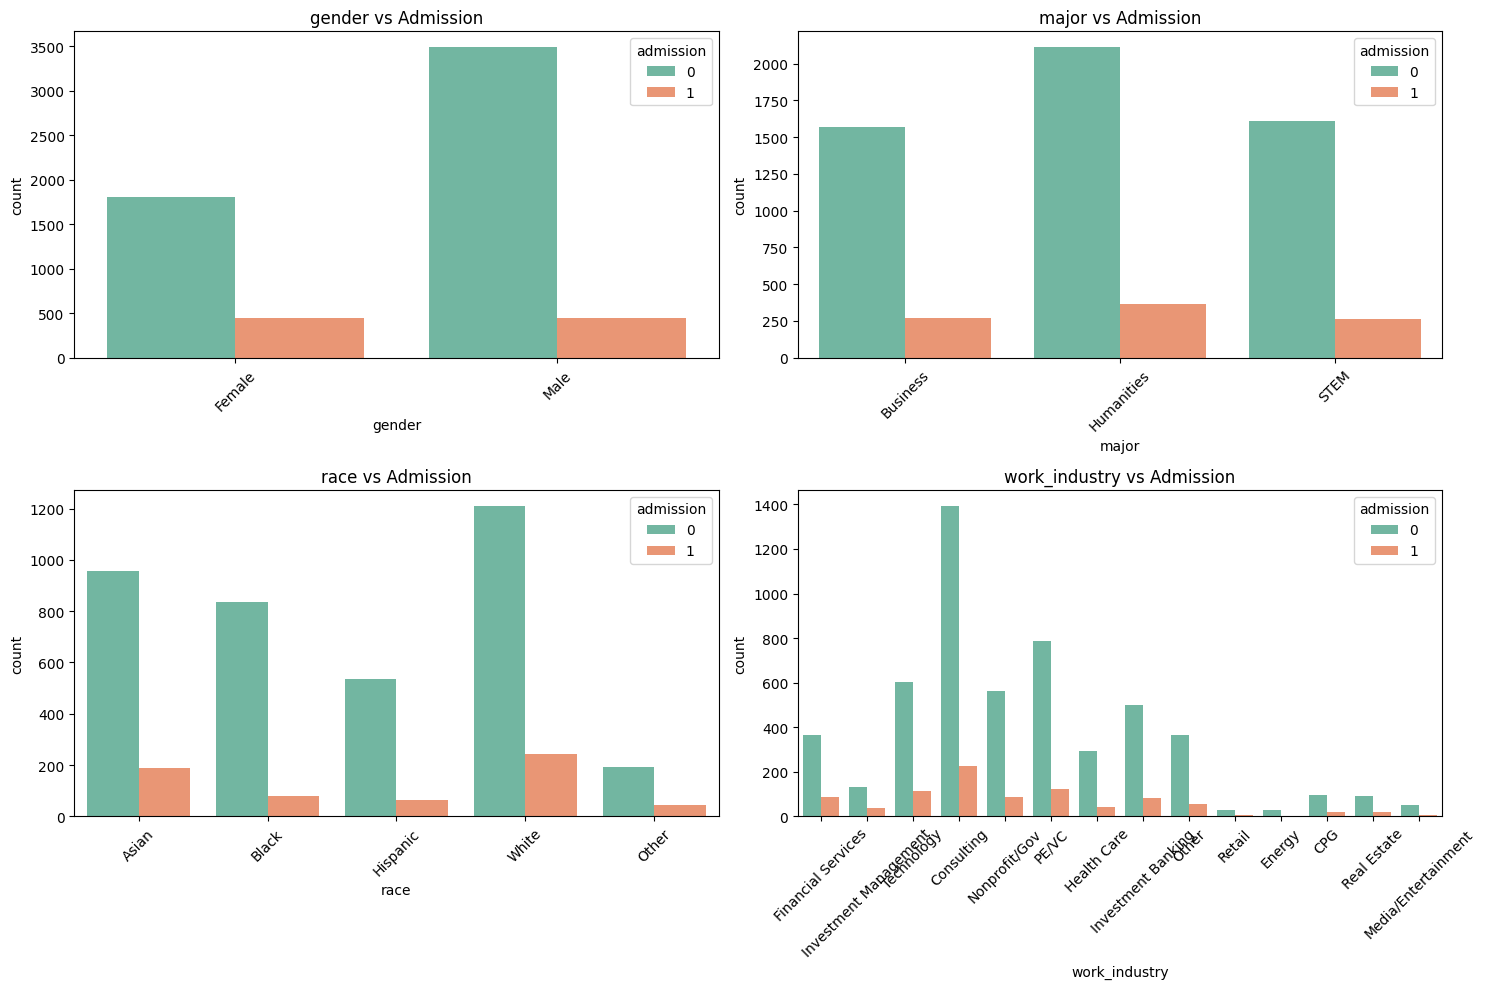

In [13]:
# Barplot untuk melihat hubungan antara variabel kategorikal dan admission
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='admission', data=data, palette='Set2')
    plt.title(f"{col} vs Admission")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Gender vs Admission

    * Proporsi mahasiswa yang diterima antara laki-laki dan perempuan hampir seimbang.
    * Hanya sebagian kecil dari kedua kelompok yang masuk daftar tunggu (waitlist).

2. Major vs Admission

    * Mahasiswa dari Humanities memiliki jumlah penerimaan tertinggi, diikuti oleh Business dan STEM.
    * Persentase mahasiswa yang masuk daftar tunggu relatif kecil di semua jurusan.

3. Race vs Admission

    * Mayoritas mahasiswa yang diterima berasal dari kelompok White dan Asian.
    * Kelompok Black, Hispanic, dan Other memiliki jumlah penerimaan yang lebih rendah.

4. Work Industry vs Admission

    * Industri Consulting memiliki jumlah penerimaan tertinggi, diikuti oleh Technology dan Nonprofit/Government.
    * Industri seperti Retail, Real Estate, Media/Entertainment, dan Energy memiliki penerimaan yang lebih sedikit.

Kesimpulan

Penerimaan mahasiswa didominasi oleh mereka yang berasal dari jurusan Humanities, ras White & Asian, serta industri Consulting & Technology. Sementara itu, daftar tunggu tersebar merata tanpa perbedaan mencolok antar kelompok.

# Analisis Multivariate

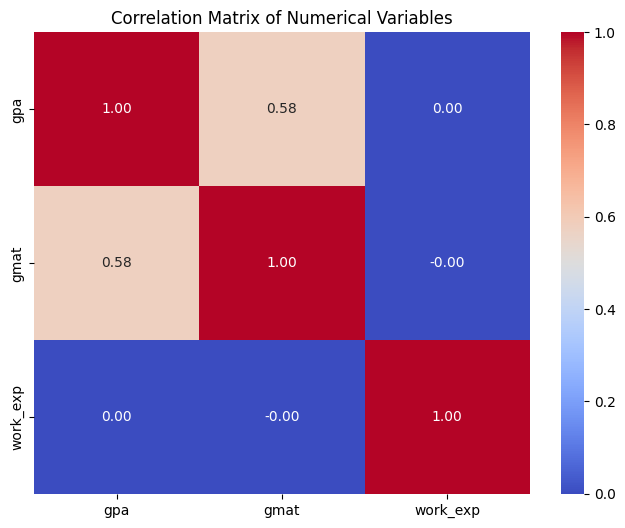

In [14]:
# Hitung matriks korelasi
corr_matrix = data[numerical_cols].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

GPA dan GMAT memiliki korelasi positif sedang sebesar 0.58, yang menunjukkan bahwa mahasiswa dengan GPA tinggi cenderung memiliki skor GMAT yang lebih tinggi.

GPA dan Work Experience serta GMAT dan Work Experience memiliki korelasi mendekati 0.00, yang berarti tidak ada hubungan linier antara pengalaman kerja dengan GPA maupun GMAT.

Secara umum, hanya GPA dan GMAT yang memiliki hubungan yang cukup kuat, sedangkan faktor pengalaman kerja tampaknya tidak terkait langsung dengan faktor akademik.

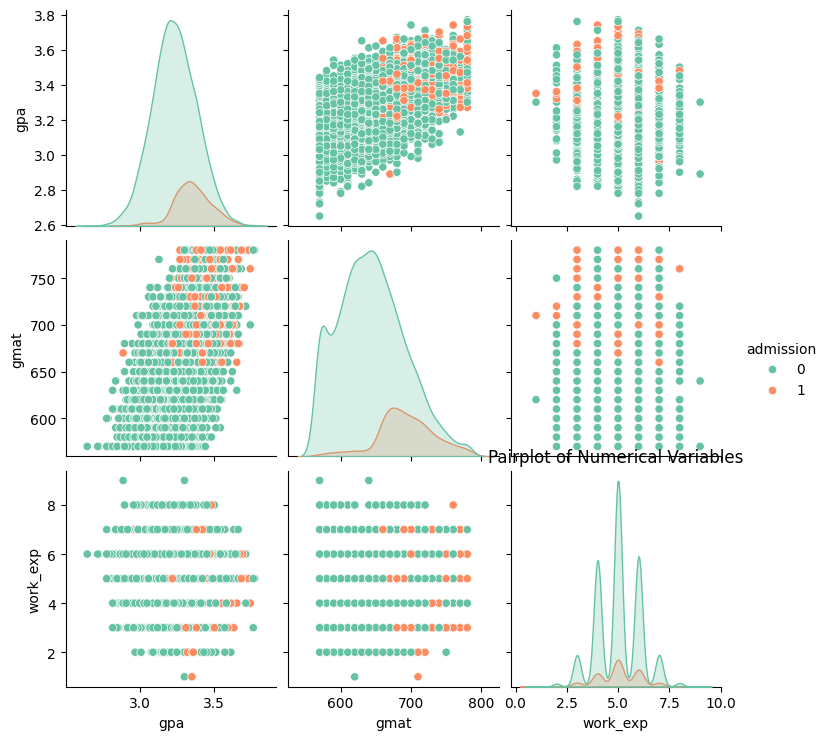

In [15]:
# Pairplot untuk melihat hubungan antara variabel numerik
sns.pairplot(data[numerical_cols + ['admission']], hue='admission', palette='Set2')
plt.title("Pairplot of Numerical Variables")
plt.show()

1. Hubungan GPA dan GMAT terlihat memiliki tren positif, yang sesuai dengan hasil korelasi sebelumnya (0.58).

2. Work Experience tersebar lebih luas, menunjukkan bahwa ada variasi pengalaman kerja yang cukup besar di antara kandidat.

3. Distribusi GPA dan GMAT menunjukkan pola yang menyerupai distribusi normal, dengan mayoritas kandidat memiliki nilai di sekitar rentang tengah.

4. Kategori Admission (Admit vs. Waitlist)
    * Kandidat yang diterima (Admit) cenderung memiliki GPA dan GMAT lebih tinggi dibandingkan mereka yang masuk daftar tunggu (Waitlist).
    * Tidak ada pola yang jelas antara Work Experience dan Admission, yang menunjukkan bahwa pengalaman kerja mungkin bukan faktor utama dalam keputusan penerimaan.

# Enoding

In [16]:
# Mapping kategori ke angka (contoh ordinal encoding)
major_mapping = {cat: i for i, cat in enumerate(X_train['major'].unique(), 1)}
race_mapping = {cat: i for i, cat in enumerate(X_train['race'].unique(), 1)}
industry_mapping = {cat: i for i, cat in enumerate(X_train['work_industry'].unique(), 1)}

# Encode kolom
X_train['major'] = X_train['major'].map(major_mapping)
X_train['race'] = X_train['race'].map(race_mapping)
X_train['work_industry'] = X_train['work_industry'].map(industry_mapping)

In [17]:
# Mapping kategori ke angka (contoh ordinal encoding)
major_mapping = {cat: i for i, cat in enumerate(X_test['major'].unique(), 1)}
race_mapping = {cat: i for i, cat in enumerate(X_test['race'].unique(), 1)}
industry_mapping = {cat: i for i, cat in enumerate(X_test['work_industry'].unique(), 1)}

# Encode kolom
X_test['major'] = X_test['major'].map(major_mapping)
X_test['race'] = X_test['race'].map(race_mapping)
X_test['work_industry'] = X_test['work_industry'].map(industry_mapping)


In [18]:
X_train['gender'] = X_train['gender'].map({'Male': 1, 'Female': 0})
X_test['gender'] = X_test['gender'].map({'Male': 1, 'Female': 0})


# Modeling

In [19]:
# Normalisasi sebelum SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Gunakan scaler yang sama untuk X_test

# Terapkan SMOTE hanya pada training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

## Random Forest

In [20]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model menggunakan data yang telah di-resample
rf_model.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data uji
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluasi model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7982243744955609
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1043
           1       0.39      0.51      0.44       196

    accuracy                           0.80      1239
   macro avg       0.65      0.68      0.66      1239
weighted avg       0.82      0.80      0.81      1239



In [21]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Buat DataFrame untuk menampilkan hasil dalam tabel
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Tampilkan tabel
print(metrics_df)

      Metric     Score
0   Accuracy  0.798224
1  Precision  0.821224
2     Recall  0.798224
3   F1 Score  0.808052


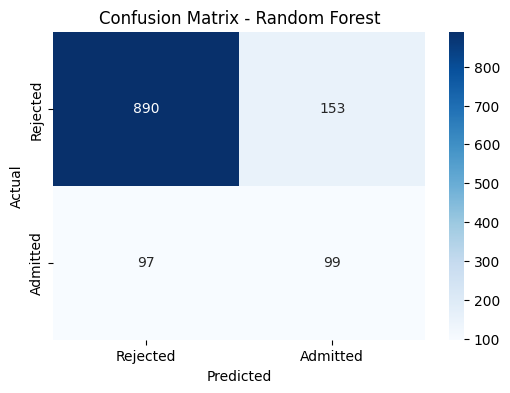

In [22]:
# Confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Admitted'], yticklabels=['Rejected', 'Admitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


## XGBoost

In [23]:
# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Latih model dengan data yang sudah di-preprocess
xgb_model.fit(X_train_resampled, y_train_resampled)

# Prediksi menggunakan data test yang sudah di-scale
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluasi model
print("\nHasil Evaluasi Model XGBoost:")
print("-" * 40)
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Hasil Evaluasi Model XGBoost:
----------------------------------------
Accuracy: 0.8055

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1043
           1       0.39      0.40      0.40       196

    accuracy                           0.81      1239
   macro avg       0.64      0.64      0.64      1239
weighted avg       0.81      0.81      0.81      1239



In [24]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

# Buat DataFrame untuk menampilkan hasil dalam tabel
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Tampilkan tabel
print(metrics_df)

      Metric     Score
0   Accuracy  0.805488
1  Precision  0.808301
2     Recall  0.805488
3   F1 Score  0.806867


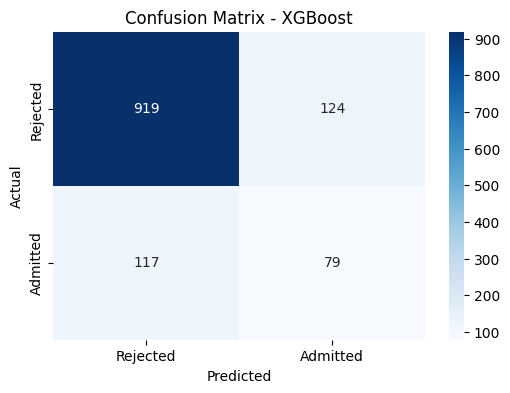

In [25]:
# Confusion matrix untuk XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Admitted'], yticklabels=['Rejected', 'Admitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

## Logistic Regresion

In [26]:
# Logistic Regression
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_resampled, y_train_resampled)
y_pred_log = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.718321226795803
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1043
           1       0.33      0.79      0.47       196

    accuracy                           0.72      1239
   macro avg       0.64      0.75      0.64      1239
weighted avg       0.85      0.72      0.75      1239



In [27]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log, average='weighted')
recall = recall_score(y_test, y_pred_log, average='weighted')
f1 = f1_score(y_test, y_pred_log, average='weighted')

# Buat DataFrame untuk menampilkan hasil dalam tabel
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Tampilkan tabel
print(metrics_df)

      Metric     Score
0   Accuracy  0.718321
1  Precision  0.849208
2     Recall  0.718321
3   F1 Score  0.754633


## SVM

In [28]:
# SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



SVM Accuracy: 0.7288135593220338
              precision    recall  f1-score   support

           0       0.95      0.71      0.82      1043
           1       0.35      0.81      0.49       196

    accuracy                           0.73      1239
   macro avg       0.65      0.76      0.65      1239
weighted avg       0.86      0.73      0.76      1239



In [29]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

# Buat DataFrame untuk menampilkan hasil dalam tabel
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Tampilkan tabel
print(metrics_df)

      Metric     Score
0   Accuracy  0.728814
1  Precision  0.856845
2     Recall  0.728814
3   F1 Score  0.763657


## KNN

In [30]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_model.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7304277643260694
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1043
           1       0.32      0.65      0.43       196

    accuracy                           0.73      1239
   macro avg       0.62      0.70      0.63      1239
weighted avg       0.83      0.73      0.76      1239



In [31]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')

# Buat DataFrame untuk menampilkan hasil dalam tabel
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Tampilkan tabel
print(metrics_df)

      Metric     Score
0   Accuracy  0.730428
1  Precision  0.825457
2     Recall  0.730428
3   F1 Score  0.761526


## Hyper Parameter Tuning

## Random Forest

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Random Forest Accuracy: 0.8038740920096852
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1043
           1       0.39      0.42      0.41       196

    accuracy                           0.80      1239
   macro avg       0.64      0.65      0.64      1239
weighted avg       0.81      0.80      0.81      1239

      Metric     Score
0   Accuracy  0.803874
1  Precision  0.389671
2     Recall  0.423469
3   F1 Score  0.405868


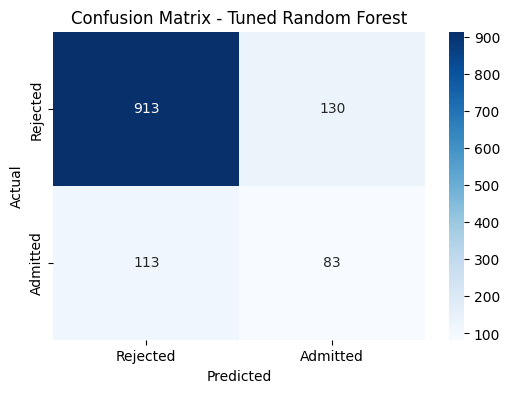

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Definisikan parameter grid untuk Random Forest
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Inisialisasi GridSearchCV
# grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                              param_grid=param_grid_rf,
#                              cv=5,
#                              scoring='accuracy',
#                              n_jobs=-1,
#                              verbose=2)

# # Lakukan pencarian hyperparameter terbaik
# grid_search_rf.fit(X_train_resampled, y_train_resampled)

# # Tampilkan hyperparameter terbaik
# print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)

# # Gunakan model dengan hyperparameter terbaik untuk prediksi
# best_rf_model = grid_search_rf.best_estimator_
# y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)

# # Evaluasi model
# print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
# print(classification_report(y_test, y_pred_rf_tuned))

# # Hitung metrik evaluasi
# accuracy = accuracy_score(y_test, y_pred_rf_tuned)
# precision = precision_score(y_test, y_pred_rf_tuned)
# recall = recall_score(y_test, y_pred_rf_tuned)
# f1 = f1_score(y_test, y_pred_rf_tuned)

# # Buat DataFrame untuk menampilkan hasil evaluasi dalam bentuk tabel
# metrics_table = pd.DataFrame({
#     'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
#     'Score': [accuracy, precision, recall, f1]
# })

# # Tampilkan tabel
# print(metrics_table)


# # Confusion matrix untuk Random Forest Tuned
# cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Admitted'], yticklabels=['Rejected', 'Admitted'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix - Tuned Random Forest')
# plt.show()

### XGboost

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:19:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters for XGBoost: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 100, 'subsample': 1.0}
Tuned XGBoost Accuracy: 0.8030669895076675
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1043
           1       0.38      0.39      0.39       196

    accuracy                           0.80      1239
   macro avg       0.63      0.64      0.63      1239
weighted avg       0.81      0.80      0.80      1239

      Metric     Score
0   Accuracy  0.803067
1  Precision  0.381188
2     Recall  0.392857
3   F1 Score  0.386935


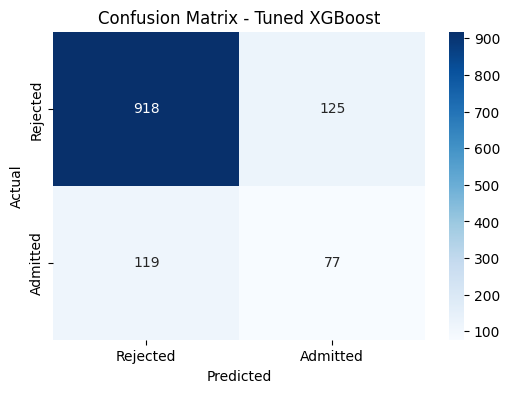

In [ ]:
# from xgboost import XGBClassifier

# # Definisikan parameter grid untuk XGBoost
# param_grid_xgb = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2]
# }

# # Inisialisasi GridSearchCV
# grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
#                                param_grid=param_grid_xgb,
#                                cv=5,
#                                scoring='accuracy',
#                                n_jobs=-1,
#                                verbose=2)

# # Lakukan pencarian hyperparameter terbaik
# grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# # Tampilkan hyperparameter terbaik
# print("Best Hyperparameters for XGBoost:", grid_search_xgb.best_params_)

# # Gunakan model dengan hyperparameter terbaik untuk prediksi
# best_xgb_model = grid_search_xgb.best_estimator_
# y_pred_xgb_tuned = best_xgb_model.predict(X_test_scaled)

# # Evaluasi model
# print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
# print(classification_report(y_test, y_pred_xgb_tuned))

# # Hitung metrik evaluasi
# accuracy = accuracy_score(y_test, y_pred_xgb_tuned)
# precision = precision_score(y_test, y_pred_xgb_tuned)
# recall = recall_score(y_test, y_pred_xgb_tuned)
# f1 = f1_score(y_test, y_pred_xgb_tuned)

# # Buat DataFrame untuk menampilkan hasil evaluasi dalam bentuk tabel
# metrics_table = pd.DataFrame({
#     'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
#     'Score': [accuracy, precision, recall, f1]
# })

# # Tampilkan tabel
# print(metrics_table)


# # Confusion matrix untuk XGBoost Tuned
# cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Admitted'], yticklabels=['Rejected', 'Admitted'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix - Tuned XGBoost')
# plt.show()